<center>![](https://pandas.pydata.org/_static/pandas_logo.png)</center>

# Overview

1. About Pandas
2. Importing
3. Basic data structure overview
4. Brief object creation tutorial
5. I/O in Pandas
6. Indexing/Exploring/Manipulating in Pandas
7. Data visualization
8. Closing

# About Pandas

## What is pandas?

[Pandas](https://pandas.pydata.org/) is a high-performance library that makes familiar data structures, like `data.frame` from R, and appropriate data analysis tools available to Python users...Python master race.

## How does pandas work?

Pandas is built off of [Numpy](http://www.numpy.org/), and therefore leverages Numpy's C-level speed for its data analysis.

However, there is one caveat...whereas Numpy can only make data structures of a single type, Pandas can use many types. Think of a SQL table, where each column can be whatever type you want it to be, so long as every item in the column is that same type.

## Why use pandas?

1. Data munging/wrangling: the cleaning and preprocessing of data
2. Loading data into memory from disparate data formats (SQL, CSV, TSV, JSON)
2. Tired of R, but still like `data.frame`
3. Don't know R
4. Want to forget R

# Importing

Probably the easiest step. Because pandas is built off of numpy, it is always usefull to import numpy at the same time. However, this isn't necessary.

In [1]:
import numpy as np
import numpy.random as nr
import pandas as pd

Additionally, we will be doing some very basic data visualization. This means we need a plotting library. The following cell shows the standard convention for importing [matplotlib](https://matplotlib.org/#) and how to use notebook `magic` to allow the plots to show in the notebook when they are generated.

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt

I am also going to import the string module just to make some naming easier later on. Furthermore, this I use this helper function to quickly make some random string labels.

In [3]:
import string

def gen_lab(n, m=1):
    '''generate a m number of n-length random labels from string.ascii_lowercase'''
    labels = []
    for i in range(m):
        out = nr.choice(list(string.ascii_lowercase), 2)
        labels.append(''.join(out))
    return labels

# Basic data structure overview

For a more thorough dive into the different data structure, feel free to read [this](https://pandas.pydata.org/pandas-docs/stable/dsintro.html#dsintro) documentation

The data structures of interest are:
1. `pd.Series`
2. `pd.DataFrame`

## Series

**One-dimensional** labeled array (or vector) 

```python
# Initialization Syntax
series = pd.Series(data, index, dtype) 
```

* **`data`** : what is going inside the Series (array-like, dict, or scalar value)
* **`index`**: row identifiers (doesn't have to be unique--think foreign key. Defaults to row number)
* **`dytpe`**: numpy/python based data types

## DataFrame

**Multi-dimensional** labeled data structure with columns of *potentially* different types

```python
# Initialization Syntax
df = pd.DataFrame(data, index, columns, dtype)
```

* **`data`** : what is going inside the DataFrame (numpy ndarray (structured or homogeneous), dict, or DataFrame)
* **`index`** : row identifiers (doesn't have to be unique--think foreign key. Defaults to row number)
* **`columns`** : column identifiers
* **`dytpe`** : numpy/python based data types

# Brief object creation tutorial

## Series

### From a Python list

In [4]:
data_list = [i for i,j in enumerate(string.ascii_lowercase[:5])]
data_list

[0, 1, 2, 3, 4]

In [5]:
a = pd.Series(data_list)
a

0    0
1    1
2    2
3    3
4    4
dtype: int64

------
Below is going to look like some crazy, but bear with me. Due to pandas having a very rich API, even a simple `Series` has a large ammount of attributes and methods. That means I want to clean it up and just look at attributes *only*, so I use the thing below to do that. </br> </br>
Let's look at the attributes of **`a`** to see what it can do...

In [6]:
dir(a)

['T',
 '_AXIS_ALIASES',
 '_AXIS_IALIASES',
 '_AXIS_LEN',
 '_AXIS_NAMES',
 '_AXIS_NUMBERS',
 '_AXIS_ORDERS',
 '_AXIS_REVERSED',
 '_AXIS_SLICEMAP',
 '__abs__',
 '__add__',
 '__and__',
 '__array__',
 '__array_prepare__',
 '__array_priority__',
 '__array_wrap__',
 '__bool__',
 '__bytes__',
 '__class__',
 '__contains__',
 '__copy__',
 '__deepcopy__',
 '__delattr__',
 '__delitem__',
 '__dict__',
 '__dir__',
 '__div__',
 '__divmod__',
 '__doc__',
 '__eq__',
 '__finalize__',
 '__float__',
 '__floordiv__',
 '__format__',
 '__ge__',
 '__getattr__',
 '__getattribute__',
 '__getitem__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__iadd__',
 '__iand__',
 '__ifloordiv__',
 '__imod__',
 '__imul__',
 '__init__',
 '__init_subclass__',
 '__int__',
 '__invert__',
 '__ior__',
 '__ipow__',
 '__isub__',
 '__iter__',
 '__itruediv__',
 '__ixor__',
 '__le__',
 '__len__',
 '__long__',
 '__lt__',
 '__mod__',
 '__module__',
 '__mul__',
 '__ne__',
 '__neg__',
 '__new__',
 '__nonzero__',
 '__or__',
 '__pow__',
 '__

In [7]:
import types

def get_attr_list(obj):
    attributes = []
    for i in dir(obj):
        if not i.startswith('_'):
            if not isinstance(getattr(obj,i), types.MethodType):
                attributes.append(i)
    return attributes

In [8]:
get_attr_list(a)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  import sys


['T',
 'asobject',
 'at',
 'axes',
 'base',
 'data',
 'dtype',
 'dtypes',
 'empty',
 'flags',
 'ftype',
 'ftypes',
 'hasnans',
 'iat',
 'iloc',
 'imag',
 'index',
 'is_copy',
 'is_monotonic',
 'is_monotonic_decreasing',
 'is_monotonic_increasing',
 'is_unique',
 'itemsize',
 'ix',
 'loc',
 'name',
 'nbytes',
 'ndim',
 'plot',
 'real',
 'shape',
 'size',
 'strides',
 'values']

We can quickly generate additional data structures by using the attributes of existing data structures (so long as they are appropriate)

----

### Assigning an more helpful index

In [10]:
pd.Series(a, index=gen_lab(2,5))

wx   NaN
lh   NaN
sn   NaN
dd   NaN
ie   NaN
dtype: float64

In [9]:
b = pd.Series(a.values, index=gen_lab(2, 5))
b

an    0
dg    1
pt    2
yj    3
tv    4
dtype: int64

### From dictionary

In [11]:
data_dict = dict(zip(b.index, a.values))
data_dict

{'an': 0, 'dg': 1, 'pt': 2, 'tv': 4, 'yj': 3}

In [12]:
c = pd.Series(data_dict)
c

an    0
dg    1
pt    2
tv    4
yj    3
dtype: int64

### Setting the dtype

In [13]:
d = pd.Series(b, dtype=np.float16)
d

an    0.0
dg    1.0
pt    2.0
yj    3.0
tv    4.0
dtype: float16

### From numpy array

In [14]:
d = pd.Series(nr.randn(5), index=c.index, dtype=np.float64)
d

an    0.814749
dg   -0.203797
pt   -0.522347
tv    1.327653
yj   -1.092884
dtype: float64

### Naming the series

In [15]:
e = pd.Series(d, name='Foo')
e

an    0.814749
dg   -0.203797
pt   -0.522347
tv    1.327653
yj   -1.092884
Name: Foo, dtype: float64

## DataFrame

DataFrames work much in the same way as `pd.Series`. Just like `np.ndarray`, it is just an extension (with some caveats) into a different dimensionality.

### From list

In [16]:
in_dat = [data_list, data_list[::-1]]
in_dat

[[0, 1, 2, 3, 4], [4, 3, 2, 1, 0]]

In [17]:
dfa = pd.DataFrame(in_dat)
dfa

,0,1,2,3,4
0,0,1,2,3,4
1,4,3,2,1,0


----
Again, let's look at the attributes of a dataframe

In [18]:
get_attr_list(dfa)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  import sys


['T',
 'at',
 'axes',
 'columns',
 'dtypes',
 'empty',
 'ftypes',
 'iat',
 'iloc',
 'index',
 'is_copy',
 'ix',
 'loc',
 'ndim',
 'plot',
 'shape',
 'size',
 'style',
 'values']

### Add an index

In [19]:
dfb = pd.DataFrame(dfa.values, index=list(string.ascii_lowercase[:len(in_dat)]))
dfb

,0,1,2,3,4
a,0,1,2,3,4
b,4,3,2,1,0


### Add column names

Because this is a dataframe, we can add both and index ***and*** column names

In [20]:
dfc = pd.DataFrame(dfb.values, index=dfb.index, columns=gen_lab(2, len(in_dat[0])))
dfc

,rd,hh,hp,qf,vb
a,0,1,2,3,4
b,4,3,2,1,0


### Add a dtype

In [21]:
dfd = pd.DataFrame(dfc, dtype=np.float16)
dfd

,rd,hh,hp,qf,vb
a,0.0,1.0,2.0,3.0,4.0
b,4.0,3.0,2.0,1.0,0.0


In [22]:
dfd.dtypes

rd    float16
hh    float16
hp    float16
qf    float16
vb    float16
dtype: object

As seen, if you set a `dtype` for the `DataFrame`, you set it for ***all*** of the elements. However, you can always set the column dtypes individually. We will look at this later.

### From a dictionary

In [23]:
two_d_dict = dict(zip(dfd.index,in_dat))
two_d_dict

{'a': [0, 1, 2, 3, 4], 'b': [4, 3, 2, 1, 0]}

In [24]:
dfe = pd.DataFrame(two_d_dict, index = dfd.columns).T
dfe

,rd,hh,hp,qf,vb
a,0,1,2,3,4
b,4,3,2,1,0


### From numpy array

In [25]:
arr_1 = nr.randint(0, 100, (3,4))
arr_1

array([[86, 57, 37, 93],
       [46, 66, 33, 73],
       [61,  4, 66, 31]])

In [26]:
dff = pd.DataFrame(arr_1, index = list(string.ascii_lowercase[:arr_1.shape[0]]), columns = gen_lab(2, arr_1.shape[1]))
dff

,ae,gp,yt,vl
a,86,57,37,93
b,46,66,33,73
c,61,4,66,31


### From `pd.Series`

#### Row-wise (`append`)

In [27]:
# Remember pd.Series a?
a = a.rename('original')
print(a)
a_rev = pd.Series(a.values[::-1], name='reveresed', dtype=np.float16)
a_rev

0    0
1    1
2    2
3    3
4    4
Name: original, dtype: int64


0    4.0
1    3.0
2    2.0
3    1.0
4    0.0
Name: reveresed, dtype: float16

In [28]:
# Create the original DataFrame
df_rows = pd.DataFrame(a).T
df_rows

,0,1,2,3,4
original,0,1,2,3,4


In [29]:
# Now add on a row
df_rows.append(a_rev)

,0,1,2,3,4
original,0.0,1.0,2.0,3.0,4.0
reveresed,4.0,3.0,2.0,1.0,0.0


#### Column-wise (`join`/`concat`)

In [30]:
df_columns = pd.DataFrame(nr.randn(3,4))
df_columns.columns = [gen_lab(2, 4)]
df_columns

,jj,of,qe,yn
0,-0.022219,2.071940,0.273198,-0.082953
1,2.647909,0.130612,-0.159867,0.630418
2,0.528930,1.058047,-1.221036,0.060799


#### `join`

In [31]:
p = df_columns.join(a_rev)

In [33]:
p

,"(jj,)","(of,)","(qe,)","(yn,)",reveresed
0,-0.022219,2.071940,0.273198,-0.082953,4.0
1,2.647909,0.130612,-0.159867,0.630418,3.0
2,0.528930,1.058047,-1.221036,0.060799,2.0


In [32]:
p.dtypes

(jj,)        float64
(of,)        float64
(qe,)        float64
(yn,)        float64
reveresed    float16
dtype: object

#### `concat`

In [34]:
# Same size
pd.concat([df_columns, a_rev[:3]], axis=1)

,"(jj,)","(of,)","(qe,)","(yn,)",reveresed
0,-0.022219,2.071940,0.273198,-0.082953,4.0
1,2.647909,0.130612,-0.159867,0.630418,3.0
2,0.528930,1.058047,-1.221036,0.060799,2.0


In [35]:
# Unequal size
pd.concat([df_columns, a_rev], axis=1)

,"(jj,)","(of,)","(qe,)","(yn,)",reveresed
0,-0.022219,2.071940,0.273198,-0.082953,4.0
1,2.647909,0.130612,-0.159867,0.630418,3.0
2,0.528930,1.058047,-1.221036,0.060799,2.0
3,NaN,NaN,NaN,NaN,1.0
4,NaN,NaN,NaN,NaN,0.0


### 3D DataFrame

Special instructions on multi-dimensional dataframe: It is necessary to use `pd.MultiIndex` for three dimensional data. Previously, there was a `pd.Panel` data structure...but has since been deprecated.

In [36]:
three_d_idx = pd.MultiIndex.from_arrays([['x', 'x'], list('yz')])
three_d_idx

MultiIndex(levels=[['x'], ['y', 'z']],
           labels=[[0, 0], [0, 1]])

In [37]:
dfg = pd.DataFrame(nr.randn(2,4), index=three_d_idx)
dfg

0         1         2         3
x y  0.816235  1.400826  0.196561  0.058604
  z -0.632679 -0.594737  1.364342  0.928567

A better way to think about this is like a treatment time series.

In [38]:
t = pd.date_range('20180409', periods=6).to_series()
t1 = t.append(t.copy()).sort_values().T
pos = ['beg_fluorescence', 'stop_fluorescence'] * 5
idx = pd.MultiIndex.from_tuples(list(zip(t1, pos)))

In [39]:
time_series = pd.DataFrame(nr.randn(10,10), columns=idx)
time_series.T

0         1         2         3  \
2018-04-09 beg_fluorescence   0.843764  1.274120 -1.581831 -0.212069   
           stop_fluorescence  0.294704 -1.482157  1.680214  0.929258   
2018-04-10 beg_fluorescence   0.795554 -1.315608 -0.231103 -0.159420   
           stop_fluorescence -0.848185 -1.130202  0.003517 -0.029682   
2018-04-11 beg_fluorescence   0.936253 -0.018692 -0.764515  0.844917   
           stop_fluorescence -0.062591 -1.381555 -1.201256 -0.501183   
2018-04-12 beg_fluorescence  -1.271173  1.080960 -0.105720 -0.377695   
           stop_fluorescence -2.709801 -0.766298 -0.393091 -0.043071   
2018-04-13 beg_fluorescence   0.625390  0.097721 -0.078483 -0.752624   
           stop_fluorescence  1.248301  1.559281 -0.239570  1.427851   

                                     4         5         6         7  \
2018-04-09 beg_fluorescence   0.516057 -0.052271 -0.354953 -0.950046   
           stop_fluorescence -0.516580 -0.203354 -0.970671  1.244797   
2018-04-10 beg_fluorescence  -0.181785 -0.131861 -0.399621  0.213306   
           stop_fluorescence  0.315253 -0.379191  0.401546  0.231737   
2018-04-11 beg_fluorescence  -1.149634 -0.763196 -1.170703 -0.750333   
           stop_fluorescence -0.019384  0.945914  1.887011  0.658018   
2018-04-12 beg_fluorescence  -1.290758 -0.045695  0.832710 -0.044552   
           stop_fluorescence -0.779786 -0.509045 -0.622204 -0.245268   
2018-04-13 beg_fluorescence  -0.175796 -0.126384 -1.268916  0.609061   
           stop_fluorescence -0.054956 -0.970424 -1.203323 -0.157062   

                                     8         9  
2018-04-09 beg_fluorescence  -1.202392  1.712888  
           stop_fluorescence  0.651367  1.665136  
2018-04-10 beg_fluorescence  -0.740987  0.094953  
           stop_fluorescence  0.353270  2.385119  
2018-04-11 beg_fluorescence   0.928201 -1.321969  
           stop_fluorescence  0.093237  1.140676  
2018-04-12 beg_fluorescence  -0.681504  1.827478  
           stop_fluorescence -0.258310  1.723022  
2018-04-13 beg_fluorescence  -0.279146 -0.868911  
           stop_fluorescence  0.566432 -0.066136

# I/O in Pandas

One of the biggest reasons people use pandas is to bring data in without having to mess around with file I/O, delimiters, and type conversion. Pandas, is a one-stop shop for a lot of this.

### CSV Files

#### Input

In [40]:
pd.read_csv('real_estate.csv')

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude
0,3526 HIGH ST,SACRAMENTO,95838,CA,2,1,836,Residential,Wed May 21 00:00:00 EDT 2008,59222,38.631913,-121.434879
1,51 OMAHA CT,SACRAMENTO,95823,CA,3,1,1167,Residential,Wed May 21 00:00:00 EDT 2008,68212,38.478902,-121.431028
2,2796 BRANCH ST,SACRAMENTO,95815,CA,2,1,796,Residential,Wed May 21 00:00:00 EDT 2008,68880,38.618305,-121.443839
3,2805 JANETTE WAY,SACRAMENTO,95815,CA,2,1,852,Residential,Wed May 21 00:00:00 EDT 2008,69307,38.616835,-121.439146
4,6001 MCMAHON DR,SACRAMENTO,95824,CA,2,1,797,Residential,Wed May 21 00:00:00 EDT 2008,81900,38.519470,-121.435768
5,5828 PEPPERMILL CT,SACRAMENTO,95841,CA,3,1,1122,Condo,Wed May 21 00:00:00 EDT 2008,89921,38.662595,-121.327813
6,6048 OGDEN NASH WAY,SACRAMENTO,95842,CA,3,2,1104,Residential,Wed May 21 00:00:00 EDT 2008,90895,38.681659,-121.351705
7,2561 19TH AVE,SACRAMENTO,95820,CA,3,1,1177,Residential,Wed May 21 00:00:00 EDT 2008,91002,38.535092,-121.481367
8,11150 TRINITY RIVER DR Unit 114,RANCHO CORDOVA,95670,CA,2,2,941,Condo,Wed May 21 00:00:00 EDT 2008,94905,38.621188,-121.270555
9,7325 10TH ST,RIO LINDA,95673,CA,3,2,1146,Residential,Wed May 21 00:00:00 EDT 2008,98937,38.700909,-121.442979


#### Output

You can also, just as easily, save your `DataFrames`

In [41]:
time_series.to_csv()

',2018-04-09 00:00:00,2018-04-09 00:00:00,2018-04-10 00:00:00,2018-04-10 00:00:00,2018-04-11 00:00:00,2018-04-11 00:00:00,2018-04-12 00:00:00,2018-04-12 00:00:00,2018-04-13 00:00:00,2018-04-13 00:00:00\n,beg_fluorescence,stop_fluorescence,beg_fluorescence,stop_fluorescence,beg_fluorescence,stop_fluorescence,beg_fluorescence,stop_fluorescence,beg_fluorescence,stop_fluorescence\n0,0.8437640628490046,0.29470436534984484,0.7955544709922411,-0.8481852473362237,0.9362531125924183,-0.06259146866549041,-1.2711725680382564,-2.709801295191622,0.6253899927979863,1.2483013014592819\n1,1.2741200876778285,-1.4821571323062797,-1.3156081497359964,-1.1302016849085206,-0.018692129700282886,-1.3815550131512133,1.0809604003179176,-0.76629820632411,0.09772086261654515,1.5592813174378892\n2,-1.5818311237633553,1.680214108420773,-0.2311027498272529,0.0035169311421782805,-0.7645153184729468,-1.2012564154453196,-0.10572029914008506,-0.3930911189232981,-0.07848255960577383,-0.2395697269927247\n3,-0.212069213648

**NOTE: **You can always put a filename in the function above to have it save to file...I just didn't feel like it.

### Excel Files

#### Input

In [42]:
pd.read_excel('sample_excel.xlsx').head()

,Segment,Country,Product,Discount Band,Units Sold,Manufacturing Price,Sale Price,Gross Sales,Discounts,Sales,COGS,Profit,Date,Month Number,Month Name,Year
0,Government,Canada,Carretera,None,1618.5,3,20,32370.0,0.0,32370.0,16185.0,16185.0,2014-01-01,1,January,2014
1,Government,Germany,Carretera,None,1321.0,3,20,26420.0,0.0,26420.0,13210.0,13210.0,2014-01-01,1,January,2014
2,Midmarket,France,Carretera,None,2178.0,3,15,32670.0,0.0,32670.0,21780.0,10890.0,2014-06-01,6,June,2014
3,Midmarket,Germany,Carretera,None,888.0,3,15,13320.0,0.0,13320.0,8880.0,4440.0,2014-06-01,6,June,2014
4,Midmarket,Mexico,Carretera,None,2470.0,3,15,37050.0,0.0,37050.0,24700.0,12350.0,2014-06-01,6,June,2014


#### Output

In [43]:
excel_writer = pd.ExcelWriter('excel_output.xlsx')
time_series.to_excel(excel_writer, 'Sheet1')

### TSV Files

#### Input

In [44]:
pd.read_table('sample_tsv.tsv').tail()

,host,logname,time,method,url,response,bytes,referer,useragent
30964,192.251.220.242,-,807302590,GET,/history/apollo/apollo.html,200,3260,NaN,NaN
30965,146.154.25.183,-,807302598,GET,/shuttle/missions/sts-69/mission-sts-69.html,200,10566,NaN,NaN
30966,128.183.76.159,-,807302607,GET,/ksc.html,200,7280,NaN,NaN
30967,204.212.251.2,-,807302964,GET,/images/rss.gif,200,139264,NaN,NaN
30968,192.94.94.33,-,807303121,GET,/shuttle/countdown/video/livevideo.jpeg,200,40960,NaN,NaN


### Clipboard

#### Copy

In [45]:
time_series.to_clipboard()

In [ ]:
	2018-04-09 00:00:00	2018-04-09 00:00:00	2018-04-10 00:00:00	2018-04-10 00:00:00	2018-04-11 00:00:00	2018-04-11 00:00:00	2018-04-12 00:00:00	2018-04-12 00:00:00	2018-04-13 00:00:00	2018-04-13 00:00:00
	beg_fluorescence	stop_fluorescence	beg_fluorescence	stop_fluorescence	beg_fluorescence	stop_fluorescence	beg_fluorescence	stop_fluorescence	beg_fluorescence	stop_fluorescence
0	0.8437640628490046	0.29470436534984484	0.7955544709922411	-0.8481852473362237	0.9362531125924183	-0.06259146866549041	-1.2711725680382564	-2.709801295191622	0.6253899927979863	1.2483013014592819
1	1.2741200876778285	-1.4821571323062797	-1.3156081497359964	-1.1302016849085206	-0.018692129700282886	-1.3815550131512133	1.0809604003179176	-0.76629820632411	0.09772086261654515	1.5592813174378892
2	-1.5818311237633553	1.680214108420773	-0.2311027498272529	0.0035169311421782805	-0.7645153184729468	-1.2012564154453196	-0.10572029914008506	-0.3930911189232981	-0.07848255960577383	-0.2395697269927247
3	-0.2120692136483637	0.9292579293332327	-0.15942040184851514	-0.029682434111224214	0.8449170575134685	-0.5011827621774062	-0.37769458185574795	-0.043070972857119465	-0.7526235915567282	1.4278508995339716
4	0.5160571438348978	-0.5165802478905551	-0.18178499795112277	0.3152533197417652	-1.1496335731102205	-0.019384429879345955	-1.290757699317373	-0.7797856669149529	-0.17579641826784378	-0.05495629845113751
5	-0.05227120808556489	-0.2033537329597349	-0.13186110987444938	-0.37919145631996337	-0.7631958265345212	0.945914095824421	-0.04569495451190494	-0.5090454572888908	-0.12638447548209528	-0.9704243545819314
6	-0.3549529120949826	-0.9706710781093872	-0.399620527283899	0.40154564804264486	-1.170702745645506	1.8870107463622263	0.832710001248042	-0.6222044491855712	-1.2689159169302215	-1.2033226459213264
7	-0.9500457831291824	1.2447967753246547	0.2133064719381987	0.23173692995770692	-0.750332511558901	0.6580175977475702	-0.04455166589781693	-0.24526777439764524	0.6090609347644231	-0.15706186633158617
8	-1.2023915437972283	0.6513669480062141	-0.7409869235184222	0.3532704029344822	0.928200904505217	0.09323701308648707	-0.6815038634688395	-0.25830952369203947	-0.2791460704273421	0.566432083131961
9	1.7128882054368193	1.665135646740481	0.09495309350907842	2.3851193698190287	-1.3219689367683465	1.140675919055515	1.8274775589993553	1.7230222721130941	-0.8689105466060649	-0.06613561495067284


#### Paste

In [46]:
pd.read_clipboard()

,2018-04-09,00:00:00,2018-04-09.1,00:00:00.1,2018-04-10,00:00:00.2,2018-04-10.1,00:00:00.3,2018-04-11,00:00:00.4,2018-04-11.1,00:00:00.5,2018-04-12,00:00:00.6,2018-04-12.1,00:00:00.7,2018-04-13,00:00:00.8,2018-04-13.1,00:00:00.9
0,beg_fluorescence,stop_fluorescence,beg_fluorescence,stop_fluorescence,beg_fluorescence,stop_fluorescence,beg_fluorescence,stop_fluorescence,beg_fluorescence,stop_fluorescence,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0,0.8437640628490046,0.29470436534984484,0.7955544709922411,-0.8481852473362237,0.9362531125924183,-0.06259146866549041,-1.2711725680382564,-2.709801295191622,0.6253899927979863,1.248301,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,1.2741200876778285,-1.4821571323062797,-1.3156081497359964,-1.1302016849085206,-0.018692129700282886,-1.3815550131512133,1.0809604003179176,-0.76629820632411,0.09772086261654515,1.559281,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2,-1.5818311237633553,1.680214108420773,-0.2311027498272529,0.0035169311421782805,-0.7645153184729468,-1.2012564154453196,-0.10572029914008506,-0.3930911189232981,-0.07848255960577383,-0.239570,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,3,-0.2120692136483637,0.9292579293332327,-0.15942040184851514,-0.029682434111224214,0.8449170575134685,-0.5011827621774062,-0.37769458185574795,-0.043070972857119465,-0.7526235915567282,1.427851,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,4,0.5160571438348978,-0.5165802478905551,-0.18178499795112277,0.3152533197417652,-1.1496335731102205,-0.019384429879345955,-1.290757699317373,-0.7797856669149529,-0.17579641826784378,-0.054956,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,5,-0.05227120808556489,-0.2033537329597349,-0.13186110987444938,-0.37919145631996337,-0.7631958265345212,0.945914095824421,-0.04569495451190494,-0.5090454572888908,-0.12638447548209528,-0.970424,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,6,-0.3549529120949826,-0.9706710781093872,-0.399620527283899,0.40154564804264486,-1.170702745645506,1.8870107463622263,0.832710001248042,-0.6222044491855712,-1.2689159169302215,-1.203323,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,7,-0.9500457831291824,1.2447967753246547,0.2133064719381987,0.23173692995770692,-0.750332511558901,0.6580175977475702,-0.04455166589781693,-0.24526777439764524,0.6090609347644231,-0.157062,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,8,-1.2023915437972283,0.6513669480062141,-0.7409869235184222,0.3532704029344822,0.928200904505217,0.09323701308648707,-0.6815038634688395,-0.25830952369203947,-0.2791460704273421,0.566432,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### SQLite

In [47]:
import sqlite3

In [48]:
conn = sqlite3.connect('flights.db')
sql_df = pd.read_sql('SELECT * FROM airlines LIMIT 10;', conn)
sql_df

,index,id,name,alias,iata,icao,callsign,country,active
0,0,1,Private flight,\N,-,None,None,None,Y
1,1,2,135 Airways,\N,None,GNL,GENERAL,United States,N
2,2,3,1Time Airline,\N,1T,RNX,NEXTIME,South Africa,Y
3,3,4,2 Sqn No 1 Elementary Flying Training School,\N,None,WYT,None,United Kingdom,N
4,4,5,213 Flight Unit,\N,None,TFU,None,Russia,N
5,5,6,223 Flight Unit State Airline,\N,None,CHD,CHKALOVSK-AVIA,Russia,N
6,6,7,224th Flight Unit,\N,None,TTF,CARGO UNIT,Russia,N
7,7,8,247 Jet Ltd,\N,None,TWF,CLOUD RUNNER,United Kingdom,N
8,8,9,3D Aviation,\N,None,SEC,SECUREX,United States,N
9,9,10,40-Mile Air,\N,Q5,MLA,MILE-AIR,United States,Y


# Indexing/Exploring/Manipulating in Pandas

While standard `'[]'` bracket slicing can be used, as well as `'.'` methods,

there are also 2 pandas-specific methods for indexing:
1. `.loc` -> primarily label-based
2. `.iloc` -> primarily integer-based

Additionally, Pandas allows you to do random sampling from the dataframe

In [49]:
# Load up some data to work with
index_example = pd.read_csv('real_estate.csv')
small_idx = index_example.head(10)
small_idx

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude
0,3526 HIGH ST,SACRAMENTO,95838,CA,2,1,836,Residential,Wed May 21 00:00:00 EDT 2008,59222,38.631913,-121.434879
1,51 OMAHA CT,SACRAMENTO,95823,CA,3,1,1167,Residential,Wed May 21 00:00:00 EDT 2008,68212,38.478902,-121.431028
2,2796 BRANCH ST,SACRAMENTO,95815,CA,2,1,796,Residential,Wed May 21 00:00:00 EDT 2008,68880,38.618305,-121.443839
3,2805 JANETTE WAY,SACRAMENTO,95815,CA,2,1,852,Residential,Wed May 21 00:00:00 EDT 2008,69307,38.616835,-121.439146
4,6001 MCMAHON DR,SACRAMENTO,95824,CA,2,1,797,Residential,Wed May 21 00:00:00 EDT 2008,81900,38.519470,-121.435768
5,5828 PEPPERMILL CT,SACRAMENTO,95841,CA,3,1,1122,Condo,Wed May 21 00:00:00 EDT 2008,89921,38.662595,-121.327813
6,6048 OGDEN NASH WAY,SACRAMENTO,95842,CA,3,2,1104,Residential,Wed May 21 00:00:00 EDT 2008,90895,38.681659,-121.351705
7,2561 19TH AVE,SACRAMENTO,95820,CA,3,1,1177,Residential,Wed May 21 00:00:00 EDT 2008,91002,38.535092,-121.481367
8,11150 TRINITY RIVER DR Unit 114,RANCHO CORDOVA,95670,CA,2,2,941,Condo,Wed May 21 00:00:00 EDT 2008,94905,38.621188,-121.270555
9,7325 10TH ST,RIO LINDA,95673,CA,3,2,1146,Residential,Wed May 21 00:00:00 EDT 2008,98937,38.700909,-121.442979


## `'[]'` slicing on a `pd.DataFrame` gives us a slice of **rows**

In [52]:
small_idx[:3]

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude
0,3526 HIGH ST,SACRAMENTO,95838,CA,2,1,836,Residential,Wed May 21 00:00:00 EDT 2008,59222,38.631913,-121.434879
1,51 OMAHA CT,SACRAMENTO,95823,CA,3,1,1167,Residential,Wed May 21 00:00:00 EDT 2008,68212,38.478902,-121.431028
2,2796 BRANCH ST,SACRAMENTO,95815,CA,2,1,796,Residential,Wed May 21 00:00:00 EDT 2008,68880,38.618305,-121.443839


## `'.'` operators and a column name can select a **specific named** column

In [53]:
small_idx.street

0                       3526 HIGH ST
1                        51 OMAHA CT
2                     2796 BRANCH ST
3                   2805 JANETTE WAY
4                    6001 MCMAHON DR
5                 5828 PEPPERMILL CT
6                6048 OGDEN NASH WAY
7                      2561 19TH AVE
8    11150 TRINITY RIVER DR Unit 114
9                       7325 10TH ST
Name: street, dtype: object

`'.'` operator selected columns are now just a `pd.Series` and can be `'[]'` sliced on further

In [54]:
small_idx.street[:3]

0      3526 HIGH ST
1       51 OMAHA CT
2    2796 BRANCH ST
Name: street, dtype: object

However, if it is a named column that doesn't fit well as a `'.'` name, you can use `'[]'` selection as well

In [55]:
small_idx['street'][:3]

0      3526 HIGH ST
1       51 OMAHA CT
2    2796 BRANCH ST
Name: street, dtype: object

Furthermore, you can name your rows, and select them too

In [56]:
# Give our table index some string values
small_idx.index = gen_lab(2, len(small_idx))
small_idx[:10]

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude
ub,3526 HIGH ST,SACRAMENTO,95838,CA,2,1,836,Residential,Wed May 21 00:00:00 EDT 2008,59222,38.631913,-121.434879
iy,51 OMAHA CT,SACRAMENTO,95823,CA,3,1,1167,Residential,Wed May 21 00:00:00 EDT 2008,68212,38.478902,-121.431028
br,2796 BRANCH ST,SACRAMENTO,95815,CA,2,1,796,Residential,Wed May 21 00:00:00 EDT 2008,68880,38.618305,-121.443839
qg,2805 JANETTE WAY,SACRAMENTO,95815,CA,2,1,852,Residential,Wed May 21 00:00:00 EDT 2008,69307,38.616835,-121.439146
cf,6001 MCMAHON DR,SACRAMENTO,95824,CA,2,1,797,Residential,Wed May 21 00:00:00 EDT 2008,81900,38.519470,-121.435768
dx,5828 PEPPERMILL CT,SACRAMENTO,95841,CA,3,1,1122,Condo,Wed May 21 00:00:00 EDT 2008,89921,38.662595,-121.327813
ng,6048 OGDEN NASH WAY,SACRAMENTO,95842,CA,3,2,1104,Residential,Wed May 21 00:00:00 EDT 2008,90895,38.681659,-121.351705
ms,2561 19TH AVE,SACRAMENTO,95820,CA,3,1,1177,Residential,Wed May 21 00:00:00 EDT 2008,91002,38.535092,-121.481367
bv,11150 TRINITY RIVER DR Unit 114,RANCHO CORDOVA,95670,CA,2,2,941,Condo,Wed May 21 00:00:00 EDT 2008,94905,38.621188,-121.270555
sp,7325 10TH ST,RIO LINDA,95673,CA,3,2,1146,Residential,Wed May 21 00:00:00 EDT 2008,98937,38.700909,-121.442979


In [58]:
small_idx['dx':'sp']

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude
dx,5828 PEPPERMILL CT,SACRAMENTO,95841,CA,3,1,1122,Condo,Wed May 21 00:00:00 EDT 2008,89921,38.662595,-121.327813
ng,6048 OGDEN NASH WAY,SACRAMENTO,95842,CA,3,2,1104,Residential,Wed May 21 00:00:00 EDT 2008,90895,38.681659,-121.351705
ms,2561 19TH AVE,SACRAMENTO,95820,CA,3,1,1177,Residential,Wed May 21 00:00:00 EDT 2008,91002,38.535092,-121.481367
bv,11150 TRINITY RIVER DR Unit 114,RANCHO CORDOVA,95670,CA,2,2,941,Condo,Wed May 21 00:00:00 EDT 2008,94905,38.621188,-121.270555
sp,7325 10TH ST,RIO LINDA,95673,CA,3,2,1146,Residential,Wed May 21 00:00:00 EDT 2008,98937,38.700909,-121.442979


By using this, we can now select specific items/columns/rows of a dataframe and make changes to them

In [59]:
# Silence SettingWithCopy warning
pd.set_option('mode.chained_assignment', None)
small_idx.sq__ft.dtype

dtype('int64')

In [60]:
small_idx.sq__ft = small_idx.sq__ft.astype(np.float16)

In [61]:
small_idx.sq__ft.dtype

dtype('float16')

## Selection by label: the `.loc` method

```python
# .loc syntax
small_idx.loc[row indexer, column indexer]
```

#### a slice of specific items (based on label)

In [62]:
small_idx.loc['dx':'sp', 'street']

dx                 5828 PEPPERMILL CT
ng                6048 OGDEN NASH WAY
ms                      2561 19TH AVE
bv    11150 TRINITY RIVER DR Unit 114
sp                       7325 10TH ST
Name: street, dtype: object

#### A list of desired items (based on label)

In [63]:
small_idx.loc[['dx', 'sp'], 'street']

dx    5828 PEPPERMILL CT
sp          7325 10TH ST
Name: street, dtype: object

#### Boolean indexing

In [64]:
small_idx.loc[small_idx.sq__ft > 1000]

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude
iy,51 OMAHA CT,SACRAMENTO,95823,CA,3,1,1167.0,Residential,Wed May 21 00:00:00 EDT 2008,68212,38.478902,-121.431028
dx,5828 PEPPERMILL CT,SACRAMENTO,95841,CA,3,1,1122.0,Condo,Wed May 21 00:00:00 EDT 2008,89921,38.662595,-121.327813
ng,6048 OGDEN NASH WAY,SACRAMENTO,95842,CA,3,2,1104.0,Residential,Wed May 21 00:00:00 EDT 2008,90895,38.681659,-121.351705
ms,2561 19TH AVE,SACRAMENTO,95820,CA,3,1,1177.0,Residential,Wed May 21 00:00:00 EDT 2008,91002,38.535092,-121.481367
sp,7325 10TH ST,RIO LINDA,95673,CA,3,2,1146.0,Residential,Wed May 21 00:00:00 EDT 2008,98937,38.700909,-121.442979


## Selection by position: the `.iloc` method

#### a slice of specific items (based on position)

In [65]:
small_idx.iloc[:3,2]

ub    95838
iy    95823
br    95815
Name: zip, dtype: int64

#### a slice of specific items (based on position)

In [66]:
small_idx.iloc[:5,[0,1,6,9]]

,street,city,sq__ft,price
ub,3526 HIGH ST,SACRAMENTO,836.0,59222
iy,51 OMAHA CT,SACRAMENTO,1167.0,68212
br,2796 BRANCH ST,SACRAMENTO,796.0,68880
qg,2805 JANETTE WAY,SACRAMENTO,852.0,69307
cf,6001 MCMAHON DR,SACRAMENTO,797.0,81900


In [67]:
small_idx.iloc[:5, small_idx.columns == 'sq__ft']

,sq__ft
ub,836.0
iy,1167.0
br,796.0
qg,852.0
cf,797.0


## Quick Exploration of the data

In [68]:
index_example.sq__ft.describe()

count     985.000000
mean     1314.916751
std       853.048243
min         0.000000
25%       952.000000
50%      1304.000000
75%      1718.000000
max      5822.000000
Name: sq__ft, dtype: float64

In [69]:
print('MAD: {}'.format(index_example.price.mad()))
print('SUM: {}'.format(index_example.price.aggregate(sum)))
print('Any missing values: {}'.format(index_example.price.hasnans))

MAD: 103452.16956891476
SUM: 230632100
Any missing values: False


## Object Manipulation

In [70]:
small_idx.loc[small_idx.sq__ft > 1000, 'price'] = 0 
small_idx.loc[small_idx.sq__ft > 1000]

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude
iy,51 OMAHA CT,SACRAMENTO,95823,CA,3,1,1167.0,Residential,Wed May 21 00:00:00 EDT 2008,0,38.478902,-121.431028
dx,5828 PEPPERMILL CT,SACRAMENTO,95841,CA,3,1,1122.0,Condo,Wed May 21 00:00:00 EDT 2008,0,38.662595,-121.327813
ng,6048 OGDEN NASH WAY,SACRAMENTO,95842,CA,3,2,1104.0,Residential,Wed May 21 00:00:00 EDT 2008,0,38.681659,-121.351705
ms,2561 19TH AVE,SACRAMENTO,95820,CA,3,1,1177.0,Residential,Wed May 21 00:00:00 EDT 2008,0,38.535092,-121.481367
sp,7325 10TH ST,RIO LINDA,95673,CA,3,2,1146.0,Residential,Wed May 21 00:00:00 EDT 2008,0,38.700909,-121.442979


# Data Visualization

Pandas works off of a plotting library called `matplotlib` by default. You can easily start visualizing dataframs and series just by a simple command.

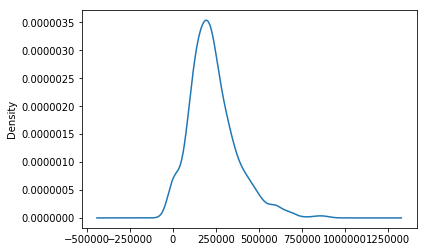

In [73]:
index_example.price.plot(kind='density')

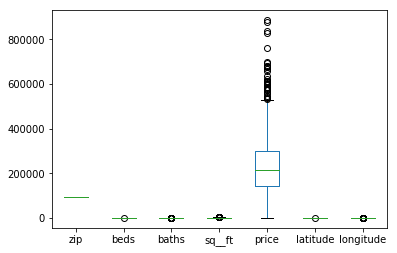

In [74]:
index_example.plot.box()

[]

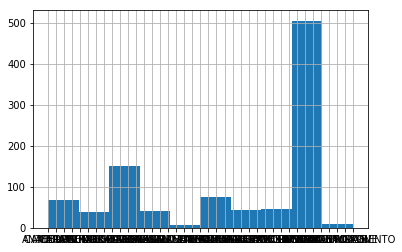

In [75]:
index_example.city.hist().plot(rot=45)

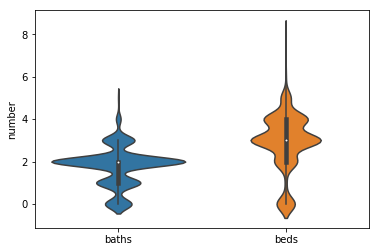

In [76]:
import seaborn as sns

fig, axes = plt.subplots()
sns.violinplot(data=index_example.loc[:,['baths', 'beds']], ax=axes)
axes.set_ylabel('number')
plt.show()